# 1 - K Nearest Neighbor (knn) 最近邻

```
描述：PyTorch 实现 k_nearest_neighbor（knn）算法
作者：Chenyyx
时间：2019-12-18
```

```
目录：
2.0 - knn 算法简介
2.1 - Python 版 knn 实现
2.2 - PyTorch 版 knn 实现
2.3 - 附加 - scikit-learn 版 knn 实现
```

## 2.0 - knn 算法简介

**k 最近邻（knn, k-NearestNeighbor）** 算法是数据挖掘分类技术中最简单的方法之一。算法可以用来分类或回归，分类使用最频繁。

所谓 `k 最近邻`，就是 `k` 个最近的邻居的意思，说的是每个样本都可以用它最接近的 `k` 个邻居来代表。`knn` 输入基于实例的学习（instance-based learning），属于懒惰学习（lazy learning），即 `knn` 没有显式的学习过程，也就是说，`knn` 算法没有训练阶段，数据集事先已经有了特征值和对应的分类，等待接收到新的样本后直接进行处理。

`knn` 是通过测量不同特征值之间的距离进行分类。

大致思路：如果一个样本在特征空间的 `k` 个最邻近的样本中的大多数属于某一个类别，那么该样本也划分为这个类别。`knn` 算法中，所选择的邻居都是已经正确分类的对象。该方法在分类决策上只依据最邻近的 **一个或几个** 样本的类别来决定待分类样本所属的类别。

在介绍 `knn` 的时候，网上最常见的就是下面这个图，可以帮助大家更好地理解。

![knn示意图](../../imgs/2_1.png)

我们要确定绿点属于哪个形状（红色的三角形或者蓝色的矩形），要做的就是选出距离目标点距离最近的 `k` 个点，然后看这 `k` 个点的大多数的形状是什么形状。
 - 当 k 取 3 的时候，我们可以看出距离最近的 3 个，分别是 红色三角形，红色三角形，蓝色矩形，因此我们可以确定绿点类别形状是 红色三角形。
 - 当 k 取 5 的时候，我们可以看出距离最近的 5 个，分别是 红色三角形，红色三角形，蓝色矩形，蓝色矩形，蓝色矩形，因此我们可以确定绿点类别形状是 蓝色矩形。

### knn 算法描述

 - 1- 计算测试数据与各个训练数据之间的距离。
 - 2- 按照距离的递增关系进行排序（从小到大）
 - 3- 选取距离最小的 k 个点
 - 4- 确定前 k 个点所在类别的出现频率
 - 5- 返回前 k 个点中出现频率最高的类别作为测试数据的预测分类

### knn 算法总结

`knn` 算法是最简单，最有效的分类算法，简单且容易实现。但是当训练数据集很大时，需要大量的存储空间，而且需要计算待测样本和训练数据集中所有样本的距离，所以会非常耗时。时间复杂度为 `O(n)`，一般适用于样本数较少的数据集，当数据量大时，可以将数据以树的形式呈现，能提高速度，常用的有 `kd-tree` 和 `ball-tree` 。

`knn` 对于随机分布的数据集分类效果较差，对于类内间距小，类间间距大的数据集分类效果好，而且对于边界不规则的数据效果好于线性分类器。

`knn` 对于样本不均衡的数据效果不好，需要进行改进。改进的其中一个方式是：对于 `k` 个近邻数据样本赋予权重，比如距离测试样本越近，权重越大。

一句话总结： **近朱者赤，近墨者黑** 。

## 2.1 - Python 版本 knn 算法实现

In [1]:
# 引入相应的库
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 创建我们需要用到的数据集和标签
def create_dataset():
    """
    创建数据集和数据样本对应的标签
    """
    features = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return features, labels

In [3]:
# knn 算法
def knn_python(input_x, dataset, labels, k):
    """
    :param input_x: 待分类的输入向量
    :param dataset: 作为参考计算距离的训练样本集
    :param labels: 数据样本对应的分类标签
    :param k: 选择最近邻样本的数目
    """
    # 1. 计算待测样本与参考样本之间的欧式距离
    dist = np.sum((input_x - dataset)**2, axis=1)**0.5
    
    # 2. 选取 k 个最近邻样本的标签
    k_labels = [labels[index] for index in dist.argsort()[0 : k]]
    
    # 3. 得到出现次数最多的标签作为最终的分类类别
    label = Counter(k_labels).most_common(1)[0][0]
    return label

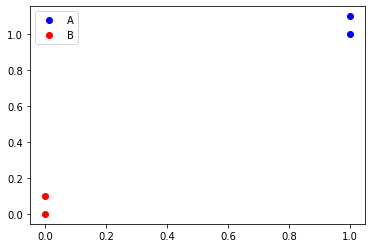

In [4]:
# 调用测试
features, labels = create_dataset()

# 将数据在图上展示出来，查看一下
plt.plot(features[:2, 0], features[:2, 1], 'bo', label='A')
plt.plot(features[2:, 0], features[2:, 1], 'ro', label='B')
plt.legend()

我们可以看到，上图中的数据，`A` 类的数据主要集中在 `(1.0, 1.0)` 点的附近，而 `B` 类的数据主要集中在 `(0, 0)` 点的附近。

In [5]:
# 设置 k
k = 3

# 构造测试数据
input_x = np.array([0.1, 0.1])

# 调用 knn 算法
result = knn_python(input_x, features, labels, k)

# 输出结果
print(result)

B


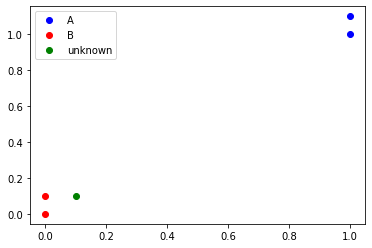

In [6]:
# 将输入的点展示在上面
plt.plot(features[:2, 0], features[:2, 1], 'bo', label='A')
plt.plot(features[2:, 0], features[2:, 1], 'ro', label='B')
plt.plot(input_x[0], input_x[1], 'go', label='unknown')
plt.legend()

观察上图，我们可以发现，我们输入的数据（input_x）显示为绿色的点（unknown），从图中显示，我们也可以看到，绿色的点很明显距离红色的点更加近。所以，我们的程序得出的结果，与我们观察得到的结果是一致的。绿色的未知点，被分类为 `B` 类。

## 2.2 - PyTorch 版本 knn 算法实现

In [7]:
# 引入相应的库
import torch as t
import torch.nn as nn
import time

# 手动设置随机种子
t.random.manual_seed(2019)

In [8]:
def knn_pytorch(ref, qry, lab, k):
    """
    PyTorch 版本的 knn 实现
    :param ref: 训练样本数据
    :param qry: 输入数据
    :param lab: 训练样本对应的labels
    :param k: k 个最近邻样本
    """
    n, d = ref.size()
    m, d = qry.size()
    mref = ref.expand(m, n, d)
    mqry = qry.expand(n, m, d).transpose(0, 1)
    
    # 计算对应的距离以及对应的索引
    dist = t.sum((mqry - mref)**2, 2).squeeze()**0.5
    dist, indx = t.topk(dist, k, dim=1, largest=False, sorted=False)
    
    # 最终要返回的结果
    k_labs = []
    for num_k in indx:
        # 获取相对应的 k 个 labels
        k_lab = [lab[index] for index in num_k]
        # 得到出现次数最多的标签作为最终的分类类别
        label = Counter(k_lab).most_common(1)[0][0]
        k_labs.append(label)
    return k_labs

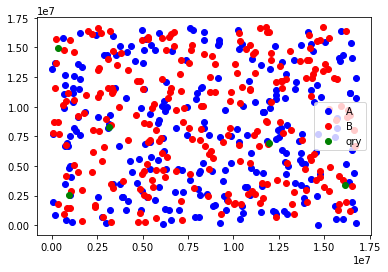

In [9]:
# 测试，调用
ref = t.Tensor(500, 2).random_()
qry = t.Tensor(5, 2).random_()

lab = ['A'] * 250
lab.extend(['B'] * 250)  # lab = ['A', 'A', ..., 'B', 'B', ...]

# 设置 k
k = 7

# 将测试使用的数据在图上画出来
plt.plot(ref[:250, 0].data.numpy(), ref[:250, 1].data.numpy(), 'bo', label='A')
plt.plot(ref[250:, 0].data.numpy(), ref[250:, 1].data.numpy(), 'ro', label='B')
plt.plot(qry[:, 0].data.numpy(), qry[:, 1].data.numpy(), 'go', label='qry')
plt.legend()

如上图所示，现在参考的样本数据有 2 个类，蓝色的为 `A`，红色的为 `B`，而其中绿色的点，则是我们的输入数据（还不知道绿色的点所对应的具体的类别）。

想知道绿色的点对应的类，那我们就使用我们的 `knn` 算法来进行预测一下。

In [10]:
t0 = time.time()
result_label = knn_pytorch(ref, qry, lab, k)

print(result_label)
print('cost_time -----', time.time() - t0)

['B', 'B', 'B', 'B', 'A']
cost_time ----- 0.0016498565673828125


可能有看不懂 `knn_pytorch` 中的 `expand` 和 `transpose` 部分的童鞋，看接下来的这个代码例子，保证你一下就能懂了。
 - expand 是扩展，直接用复制形式扩展。
 - transpose 是转置，将原来 (m, n) 形状变为 (n, m)

In [11]:
ref = t.Tensor([[1, 2], [3, 4], [5, 6], [7, 8], [9, 0]])
qry = t.Tensor([[0, 1], [2, 3], [4, 5]])

n, d = ref.size()
m, d = qry.size()
mref = ref.expand(m, n, d)
mqry = qry.expand(n, m, d).transpose(0, 1)
print('##1---', mqry.size())
print('##2---', mref)
print('##3---', mqry)
xxx = qry.expand(n, m, d)
print('##4---', xxx)

##1--- torch.Size([3, 5, 2])
##2--- tensor([[[1., 2.],
         [3., 4.],
         [5., 6.],
         [7., 8.],
         [9., 0.]],

        [[1., 2.],
         [3., 4.],
         [5., 6.],
         [7., 8.],
         [9., 0.]],

        [[1., 2.],
         [3., 4.],
         [5., 6.],
         [7., 8.],
         [9., 0.]]])
##3--- tensor([[[0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[2., 3.],
         [2., 3.],
         [2., 3.],
         [2., 3.],
         [2., 3.]],

        [[4., 5.],
         [4., 5.],
         [4., 5.],
         [4., 5.],
         [4., 5.]]])
##4--- tensor([[[0., 1.],
         [2., 3.],
         [4., 5.]],

        [[0., 1.],
         [2., 3.],
         [4., 5.]],

        [[0., 1.],
         [2., 3.],
         [4., 5.]],

        [[0., 1.],
         [2., 3.],
         [4., 5.]],

        [[0., 1.],
         [2., 3.],
         [4., 5.]]])


## 2.3 - 附加 - scikit-learn 版本 knn 算法实现


In [12]:
# 导入相关的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

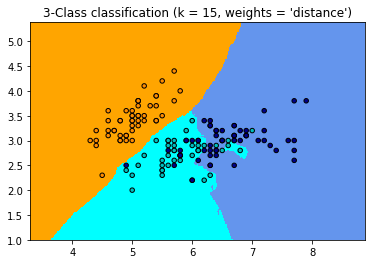

In [13]:
# 预处理数据
# 导入鸢尾花数据集
iris = datasets.load_iris()

# 因为鸢尾花数据集的特征很多，我们测试只使用前两个特征作为数据集
X = iris.data[:, :2]
y = iris.target

# 步长
h = 0.02

# 设置 k
k = 15

# 设置 weights
weights = 'distance'

# 创建 color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# 创建 knn 分类算法实例
clf = neighbors.KNeighborsClassifier(k, weights=weights)
# 拟合数据
clf.fit(X, y)

# 在图中画出每个点的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 在图上将结果展示出来
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 训练数据也画出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, weights))
plt.show()

经过以上的操作，我们就完成了 knn 算法的学习，并进行了相应的小实验，有兴趣的同学再巩固巩固吧。